# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [202]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

### Import Statements

In [203]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [204]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [205]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [206]:
print(f'Columns: {df_data.columns}')
df_data.shape

Columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


(4324, 9)

In [207]:
df_data.isna().values.any()

True

In [208]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [209]:
df_data.duplicated().values.any()

False

In [210]:
df_data.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [211]:
df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1,inplace=True)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [212]:
df_data.Price.isna().sum()

3360

## Descriptive Statistics

In [213]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [214]:
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True)
df_data['Date']

0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: Date, Length: 4324, dtype: datetime64[ns, UTC]

In [215]:
df_data.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4324 entries, 0 to 4323
Series name: Date
Non-Null Count  Dtype              
--------------  -----              
4324 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 33.9 KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

Text(0.5, 1.0, 'Organisations Countplot')

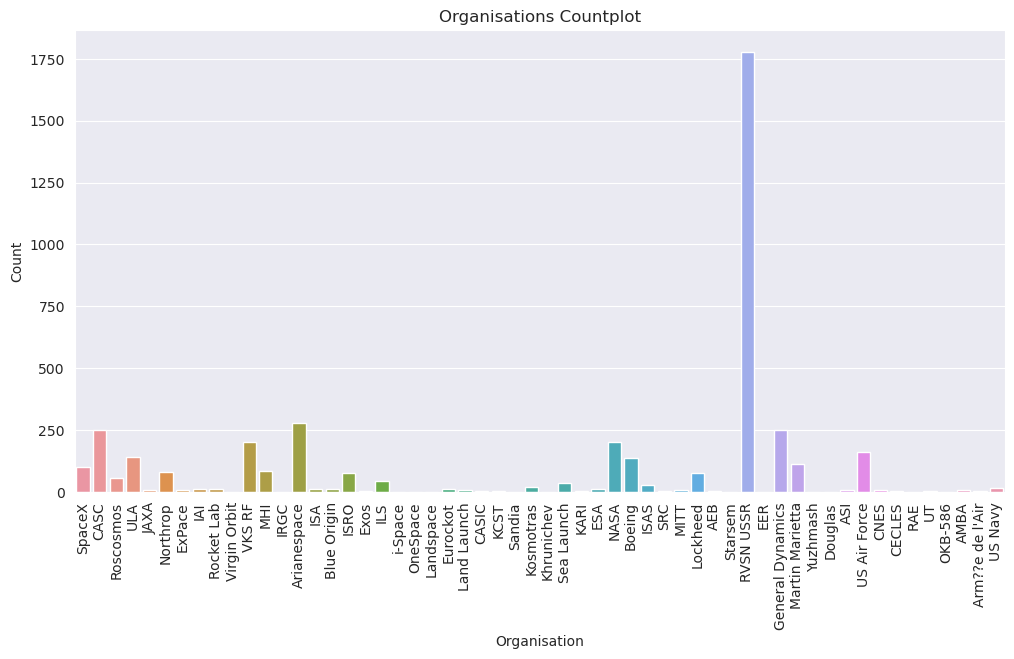

In [216]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.countplot(data=df_data, x='Organisation')
plt.ylabel('Count')
plt.title('Organisations Countplot')

In [217]:
organisation_count = df_data['Organisation'].value_counts()

In [218]:
fig = px.pie(names=organisation_count.index, values=organisation_count.values,
             title='Number of Launches per Organisation')
fig.update_traces(textinfo='none')
fig.update_layout(height=650)
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [219]:
rocket_status = df_data.Rocket_Status.value_counts()
rocket_status

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [220]:
fig = px.pie(names=rocket_status.index, values=rocket_status.values,
             title='Rocket Status Comparison')
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [221]:
df_data.Mission_Status.value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [222]:
status_count = df_data.groupby(by=['Mission_Status', 'Organisation'], as_index=False).agg(Count=('Organisation', pd.Series.count))
status = status_count.pivot(values='Count', columns='Mission_Status', index='Organisation')
status.head()

Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success
Organisation,,,,
AEB,2.00,NaN,1.00,NaN
AMBA,3.00,1.00,NaN,4.00
ASI,NaN,NaN,NaN,9.00
Arianespace,7.00,3.00,NaN,269.00
Arm??e de l'Air,NaN,1.00,NaN,3.00


<Axes: xlabel='Organisation'>

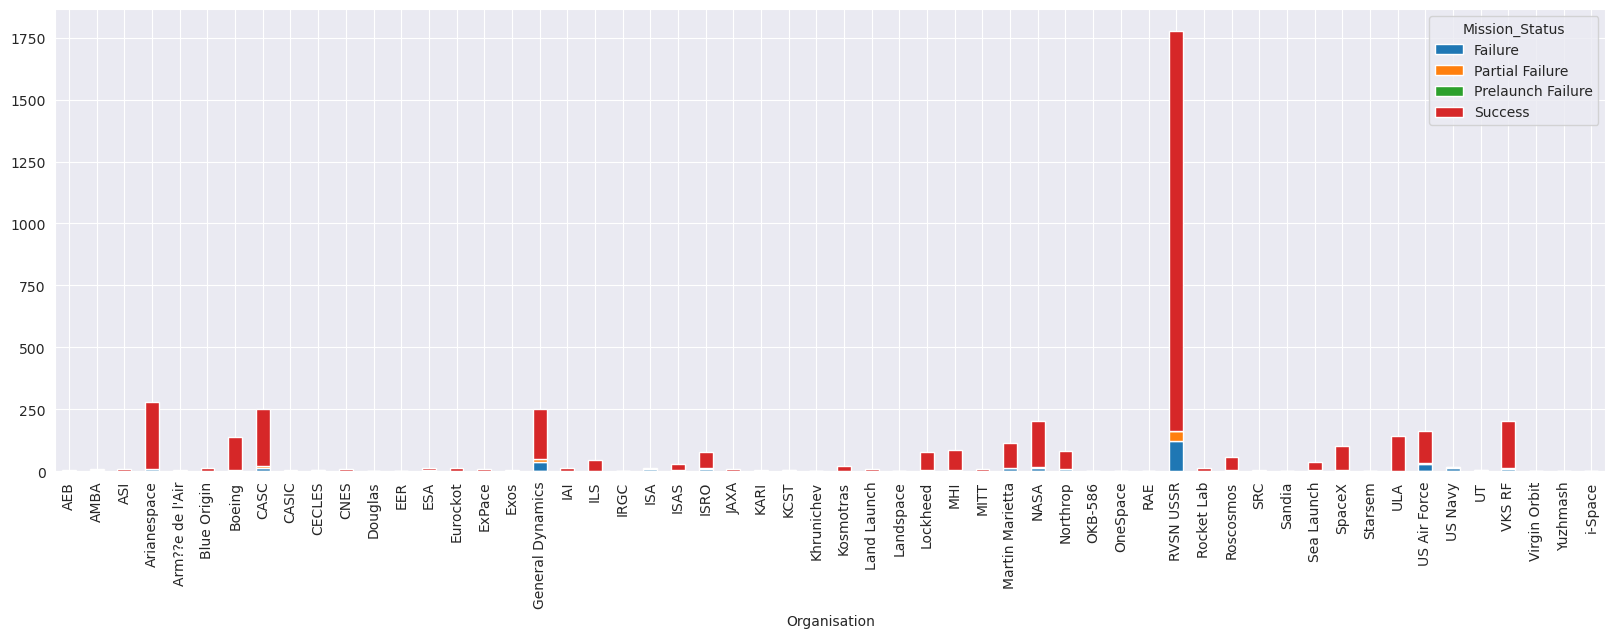

In [223]:
status.plot(kind='bar', stacked=True, figsize=(20, 6))

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [224]:
df_data.Location.value_counts()

Site 31/6, Baikonur Cosmodrome, Kazakhstan               235
Site 132/1, Plesetsk Cosmodrome, Russia                  216
Site 43/4, Plesetsk Cosmodrome, Russia                   202
Site 41/1, Plesetsk Cosmodrome, Russia                   198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                193
                                                        ... 
Jiuquan Satellite Launch Center, China                     1
LP-41, Kauai, Pacific Missile Range Facility               1
Tai Rui Barge, Yellow Sea                                  1
Launch Plateform, Shahrud Missile Test Site                1
K-496 Submarine, Barents Sea Launch Area, Barents Sea      1
Name: Location, Length: 137, dtype: int64

In [225]:
df_data['Country'] = df_data.Location.apply(lambda x: x.split()[-1])
df_data['Country'].value_counts()

Russia        1395
USA           1344
Kazakhstan     701
France         303
China          268
Japan          126
India           76
Ocean           36
Zealand         13
Iran            13
Israel          11
Kenya            9
Korea            8
Australia        6
Mexico           4
Sea              4
Brazil           3
Canaria          2
Site             1
Facility         1
Name: Country, dtype: int64

In [226]:
df_data.loc[df_data['Country'] == 'Canaria','Country'] = 'USA'
df_data.loc[df_data['Country'] == 'Mexico', 'Country'] = 'USA'
df_data.loc[df_data['Country'] == 'Site', 'Country'] = 'Iran'
df_data.loc[df_data['Country'] == 'Facility', 'Country'] = 'USA'
df_data.loc[df_data['Country'] == 'Ocean', 'Country'] = 'Pacific Ocean'
df_data.loc[df_data['Location'] == 'Tai Rui Barge, Yellow Sea', 'Country'] = 'China'

df_data['Country'].head(n=20)

df_data['Country'].value_counts()

Russia           1395
USA              1351
Kazakhstan        701
France            303
China             269
Japan             126
India              76
Pacific Ocean      36
Iran               14
Zealand            13
Israel             11
Kenya               9
Korea               8
Australia           6
Sea                 3
Brazil              3
Name: Country, dtype: int64

In [227]:
df_data.loc[df_data['Country'] == 'Sea', 'Country'] = 'Russia'
country_count = df_data['Country'].value_counts()
country_count

Russia           1398
USA              1351
Kazakhstan        701
France            303
China             269
Japan             126
India              76
Pacific Ocean      36
Iran               14
Zealand            13
Israel             11
Kenya               9
Korea               8
Australia           6
Brazil              3
Name: Country, dtype: int64

In [228]:
country_df = pd.DataFrame(data={'Country': country_count.index, 'Count': country_count.values})
country_df

,Country,Count
0,Russia,1398
1,USA,1351
2,Kazakhstan,701
3,France,303
4,China,269
5,Japan,126
6,India,76
7,Pacific Ocean,36
8,Iran,14
9,Zealand,13


In [229]:
fig = px.choropleth(data_frame=country_df, locations='Country', locationmode='country names', 
                    color='Count', projection='mollweide', title='Number of Space Mission Launches by Country',
                    color_continuous_scale=px.colors.carto.Agsunset_r)
fig.show()

# Russia and USA has the highest number of space launches
# Brazil and Australia had the least

# Use a Choropleth Map to Show the Number of Failures by Country


In [230]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [231]:
failures = df_data[df_data['Mission_Status'] == 'Failure']
failures_count = failures.groupby(['Country', 'Mission_Status'], as_index=False).agg(Count=('Country', pd.Series.count))
failures_count.head(n=15)

,Country,Mission_Status,Count
0,Australia,Failure,3
1,Brazil,Failure,2
2,China,Failure,19
3,France,Failure,13
4,India,Failure,8
5,Iran,Failure,8
6,Israel,Failure,2
7,Japan,Failure,10
8,Kazakhstan,Failure,72
9,Korea,Failure,5


In [232]:
fig = px.choropleth(data_frame=failures_count, locations='Country', locationmode='country names', 
                    color='Count', projection='mollweide', title='Number of Failures by Country',
                    color_continuous_scale=px.colors.carto.Earth_r)
fig.show()

# USA has the highest number of failed launches

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [233]:
# Convert Price values to float type format
df_data['Price'] = df_data.Price.str.replace(',', '').astype(float)
type(df_data['Price'][10])

numpy.float64

In [234]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


In [235]:
# Check for countries with missing values
df_data.groupby('Country', as_index=False).agg(Mean=('Price', pd.Series.mean))

,Country,Mean
0,Australia,NaN
1,Brazil,NaN
2,China,40.05
3,France,171.42
4,India,32.49
5,Iran,NaN
6,Israel,NaN
7,Japan,92.51
8,Kazakhstan,264.14
9,Kenya,NaN


In [236]:
df_data.isna().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
Country              0
dtype: int64

In [237]:
# Drop rows with missing values
price_data = df_data.dropna(axis=0)
price_data.isna().sum()

Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
Country           0
dtype: int64

In [238]:
price_data.shape

(964, 8)

In [239]:
px.histogram(data_frame=price_data, x=price_data.Price, title='Distribution of Revenue spent for Launches')

# Amount spent mostly ranges between 25-74 million dollars 

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [240]:
px.sunburst(data_frame=df_data, path=['Country', 'Organisation', 'Mission_Status'], 
            values='Price', color='Country')

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [241]:
total_amount = price_data.groupby('Organisation', as_index=False).agg(Total_Amount=('Price', pd.Series.sum))
total_amount

,Organisation,Total_Amount
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00
5,Eurockot,543.40
6,ExPace,28.30
7,ILS,"1,320.00"
8,ISRO,"2,177.00"
9,JAXA,168.00


<Axes: xlabel='Total_Amount', ylabel='Count'>

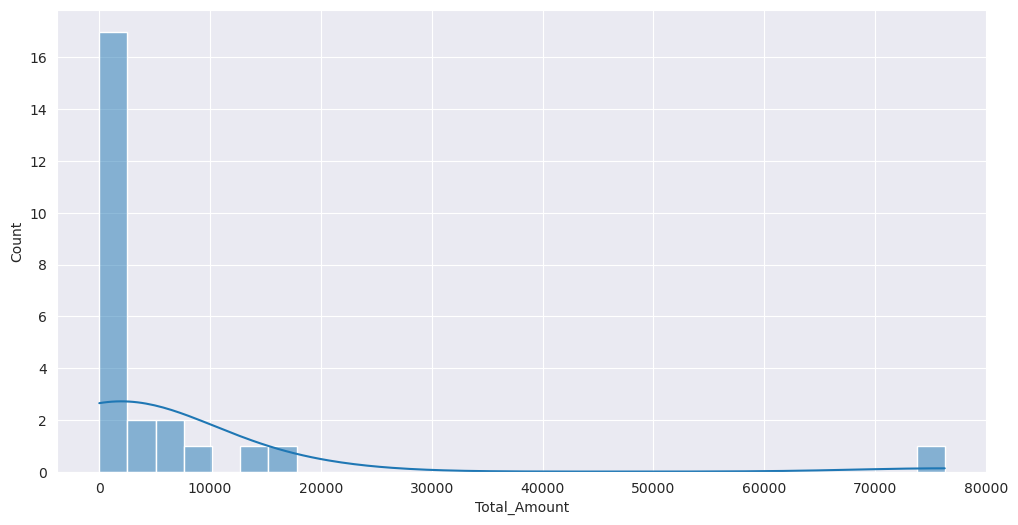

In [242]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.histplot(data=total_amount, x='Total_Amount', kde=True)

In [243]:
fig2 = px.pie(data_frame=total_amount, names='Organisation', values='Total_Amount', 
              title='Total Amount of Money Spent per Organisation')
fig2.update_traces(textinfo='none')
fig2.update_layout(height=650)
fig2.show()

# NASA apparently spents a ton of money in its operations

# Analyse the Amount of Money Spent by Organisation per Launch

In [244]:
# Check the average amount of money spent for each organisation
average_per_org = price_data.groupby('Organisation', as_index=False).agg(Average=('Price', pd.Series.mean))
average_per_org

,Organisation,Average
0,Arianespace,170.26
1,Boeing,177.29
2,CASC,40.13
3,EER,20.00
4,ESA,37.00
5,Eurockot,41.80
6,ExPace,28.30
7,ILS,101.54
8,ISRO,32.49
9,JAXA,56.00


In [245]:
fig3 = px.pie(data_frame=average_per_org, title='Average Amount of Money Spent per Organisation',
       names='Organisation', values='Average', labels='Organisation')
fig3.update_traces(textinfo='none')
fig3.update_layout(height=650)
fig3.show()

In [246]:
# Plot a boxplot to show the distribution of prices among each organisation
px.box(data_frame=price_data, x='Organisation', y='Price')

# RVSN USSR seems to have spent the highest amount of money on average

# Chart the Number of Launches per Year

In [247]:
df_data['Year'] = df_data['Date'].apply(lambda x: int(x.year))

In [248]:
table = go.Figure(data=[go.Table(header = dict(values = list(df_data.columns), 
                                               fill_color = 'paleturquoise'),
                                 cells = dict(values = [df_data.iloc[:, num] for num in range(len(df_data.columns))],
                                              fill_color = 'lavender', 
                                              align='center'))])
table.show()

In [249]:
launch_pa = df_data.groupby('Year').agg(Number_of_Launches=('Organisation', 'count'))
launch_pa.head(n=10)

,Number_of_Launches
Year,
1957,3
1958,28
1959,20
1960,39
1961,52
1962,82
1963,41
1964,60
1965,87


<Axes: title={'center': 'Number of Launches per year'}, xlabel='Year', ylabel='Number_of_Launches'>

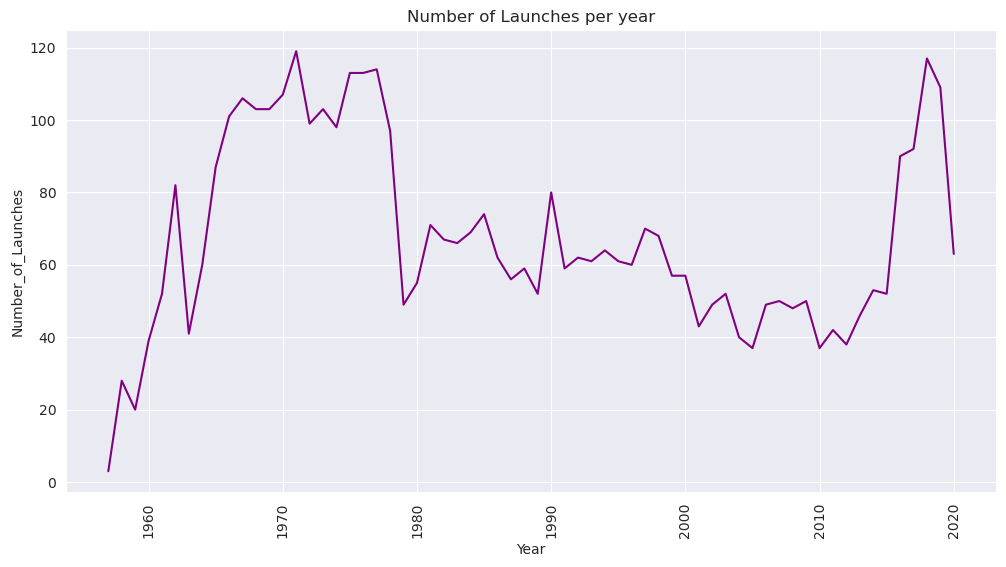

In [250]:
# Plot with Seaborn
plt.figure(figsize=(12, 6))
plt.title('Number of Launches per year')
plt.xticks(rotation=90)
sns.lineplot(x=launch_pa.index, y=launch_pa.Number_of_Launches, color='purple')

In [251]:
# Plot with Plotly
px.line(x=launch_pa.index, y=launch_pa.Number_of_Launches, title='Number of Launches per year')

# 1971 had the highest number of launches followed by 2018

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [252]:
df_data['Month_on_Month'] = pd.to_datetime(df_data['Date'].dt.strftime('%Y-%m'))
df_data.head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month_on_Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,2020-08-01
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,2020-08-01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,2020-08-01
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,2020,2020-07-01
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,2020-07-01


In [253]:
month_on_month_launches = df_data.groupby('Month_on_Month').agg(Number_of_Launches=('Location', 'count'))
month_on_month_launches.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 747 entries, 1957-10-01 to 2020-08-01
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Number_of_Launches  747 non-null    int64
dtypes: int64(1)
memory usage: 11.7 KB


In [254]:
month_on_month_launches.head(10)

,Number_of_Launches
Month_on_Month,
1957-10-01,1
1957-11-01,1
1957-12-01,1
1958-02-01,2
1958-03-01,3
1958-04-01,2
1958-05-01,2
1958-06-01,1
1958-07-01,2


In [255]:
px.line(x=month_on_month_launches.index, y=month_on_month_launches.Number_of_Launches,
        title='Number of Launches Month on Month till present')

In [256]:
rolling_avg = month_on_month_launches.rolling(window=6).mean()
rolling_avg.head(20)

,Number_of_Launches
Month_on_Month,
1957-10-01,NaN
1957-11-01,NaN
1957-12-01,NaN
1958-02-01,NaN
1958-03-01,NaN
1958-04-01,1.67
1958-05-01,1.83
1958-06-01,1.83
1958-07-01,2.00


In [257]:
# Plot using Plotly
dfs = {'Month on Month Launches': month_on_month_launches, 
       'Rolling Average Launches': rolling_avg}
line_fig = go.Figure()
for i in dfs:
    line_fig = line_fig.add_trace(go.Scatter(x=dfs[i].index, y=dfs[i].Number_of_Launches, name=i))

line_fig.update_layout(title_text='Rolling vs Month on Month Number of Launches in Plotly')    
line_fig.show()

In [258]:
merged_df = rolling_avg.sort_index().rename(columns={'Number_of_Launches': 'Average'}).join(month_on_month_launches)
merged_df.head(10)

,Average,Number_of_Launches
Month_on_Month,,
1957-10-01,NaN,1
1957-11-01,NaN,1
1957-12-01,NaN,1
1958-02-01,NaN,2
1958-03-01,NaN,3
1958-04-01,1.67,2
1958-05-01,1.83,2
1958-06-01,1.83,1
1958-07-01,2.00,2


<Axes: title={'center': 'Rolling vs Month on Month Number of Launches in Seaborn'}, xlabel='Month_on_Month'>

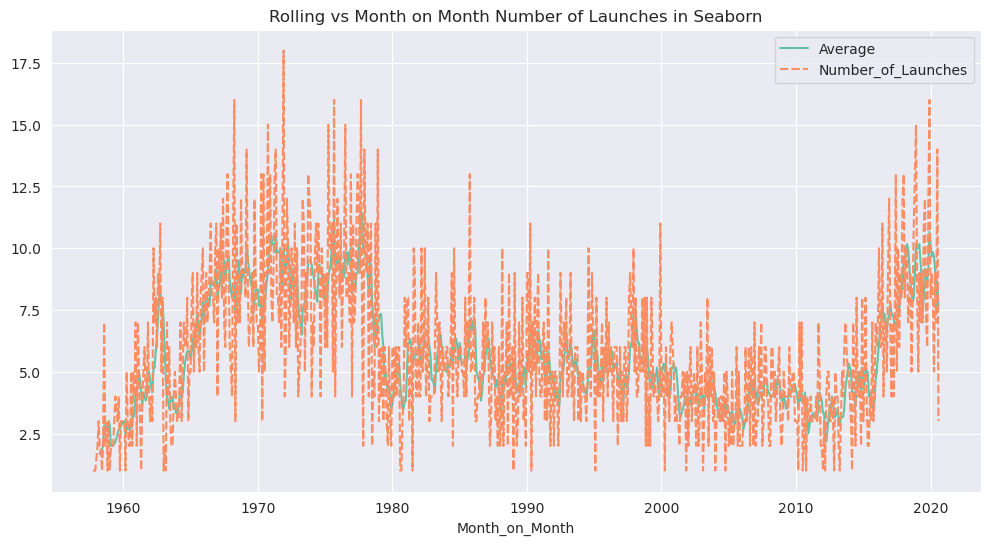

In [259]:
plt.figure(figsize=(12, 6))
plt.title('Rolling vs Month on Month Number of Launches in Seaborn')
sns.lineplot(merged_df, palette='Set2')

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [260]:
df_data['Month_Name'] = df_data.Date.dt.month_name()
df_data.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month_on_Month,Month_Name
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,2020-08-01,August
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,2020-08-01,August
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,2020-08-01,August
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,2020,2020-07-01,July
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,2020-07-01,July
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,2020,2020-07-01,July
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,Kazakhstan,2020,2020-07-01,July
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,NaN,Success,China,2020,2020-07-01,July
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,USA,2020,2020-07-01,July
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19 21:58:00+00:00,H-IIA 202 | Hope Mars Mission,StatusActive,90.00,Success,Japan,2020,2020-07-01,July


<Axes: title={'center': 'Number of Launches in a Month'}, xlabel='Month_Name', ylabel='Number_of_Launches'>

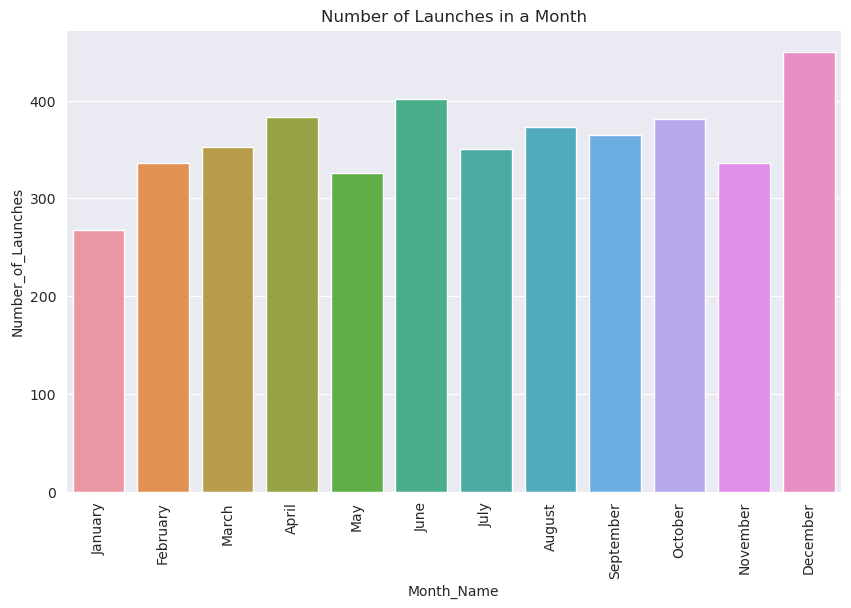

In [261]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
         'August', 'September', 'October', 'November', 'December']
monthly_df = df_data.groupby(by='Month_Name', as_index=False).agg(Number_of_Launches=('Organisation', 'count'))

plt.figure(figsize=(10, 6))
plt.title('Number of Launches in a Month')
plt.xticks(rotation=90)
sns.barplot(x=monthly_df.Month_Name, y=monthly_df.Number_of_Launches, order=order)

# December has the highest number of launches
# January has the least

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [262]:
avg_monthly_price = df_data.dropna().groupby('Month_on_Month', as_index=False).agg(Launch_Price=('Price', 'mean'))
avg_monthly_price.head()

,Month_on_Month,Launch_Price
0,1964-09-01,63.23
1,1964-12-01,63.23
2,1965-02-01,63.23
3,1965-05-01,63.23
4,1966-07-01,59.00


In [263]:
px.line(data_frame=avg_monthly_price, x='Month_on_Month', y='Launch_Price', title='Launch Price Variations over Time')

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [264]:
no_of_launches = df_data.groupby(['Organisation'], as_index=False).agg(Number_of_Launches = ('Organisation', 'count'))
top_10_org = no_of_launches.sort_values(by='Number_of_Launches', ascending=False)[:10]
top_10_org

,Organisation,Number_of_Launches
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,251
35,NASA,203
52,VKS RF,201
49,US Air Force,161
48,ULA,140
6,Boeing,136
34,Martin Marietta,114


In [265]:
merged_top_10 = df_data.merge(top_10_org, on='Organisation').drop('Number_of_Launches', axis=1)
merged_top_10.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month_on_Month,Month_Name
0,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,2020-08-01,August
1,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,2020,2020-07-01,July
2,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,NaN,Success,China,2020,2020-07-01,July
3,CASC,"LC-3, Xichang Satellite Launch Center, China",2020-07-09 12:11:00+00:00,Long March 3B/E | Apstar-6D,StatusActive,29.15,Success,China,2020,2020-07-01,July
4,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-07-04 23:44:00+00:00,Long March 2D | Shiyan-6 02,StatusActive,29.75,Success,China,2020,2020-07-01,July


In [266]:
top_10_launches = merged_top_10.groupby(['Organisation', 'Month_on_Month']).agg(Number_of_Launches=('Organisation', 'count'))
roll_top_10 = top_10_launches.rolling(6).mean('Number_of_Launches').reset_index()
roll_top_10.head(10)

,Organisation,Month_on_Month,Number_of_Launches
0,Arianespace,1984-05-01,NaN
1,Arianespace,1984-08-01,NaN
2,Arianespace,1984-11-01,NaN
3,Arianespace,1985-02-01,NaN
4,Arianespace,1985-05-01,NaN
5,Arianespace,1985-07-01,1.00
6,Arianespace,1985-09-01,1.00
7,Arianespace,1986-02-01,1.00
8,Arianespace,1986-03-01,1.00
9,Arianespace,1986-05-01,1.00


In [267]:
# Line chart without rolling average superimposed
px.line(data_frame=top_10_launches.reset_index(), x='Month_on_Month', y='Number_of_Launches', color='Organisation',
        title='No. of Launches among the top 10 organisations over Time')

# RVSN USSR has the highest number of launches in a month

In [268]:
# Line chart with rolling average superimposed
px.line(data_frame=roll_top_10, x='Month_on_Month', y='Number_of_Launches', color='Organisation', 
        title='No. of Launches among the Top 10 Organisations over Time with Rolling Averages Superimposed')

# RVSN USSR was leading in the late 6os till the early 90s

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [269]:
# Use .query to get the dataset
cold_war_race = df_data.query("(Year <= 1991) and (Country == 'USA' or Organisation == 'RVSN USSR')")
cold_war_race.Year.value_counts().sort_index(ascending=False).head()

1991    46
1990    63
1989    42
1988    43
1987    48
Name: Year, dtype: int64

In [270]:
cold_war_race.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month_on_Month,Month_Name
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,Kazakhstan,1991,1991-12-01,December
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,1991,1991-12-01,December
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,1991,1991-11-01,November
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,Russia,1991,1991-11-01,November
1724,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991-11-24 23:44:00+00:00,Space Shuttle Atlantis | STS-44,StatusRetired,450.00,Success,USA,1991,1991-11-01,November


In [271]:
# We see three countries are included since Kazakhstan was also involved in USSR
cold_war_launches = cold_war_race.Country.value_counts()
cold_war_launches

Russia        1187
USA            662
Kazakhstan     578
Name: Country, dtype: int64

In [272]:
# We add the count of Kazakhstan and Russian launches to get the total number of USSR's launches
ussr_sum = cold_war_launches.loc['Kazakhstan'] + cold_war_launches.loc['Russia']

# Create a new dataframe containing the new count
cold_war_space_race = pd.DataFrame(index=['USA', 'USSR'], data=[cold_war_launches.loc['USA'], ussr_sum], columns=['Count'])
cold_war_space_race

,Count
USA,662
USSR,1765


In [273]:
cold_war_fig = px.bar(x=cold_war_space_race.index, y=cold_war_space_race.Count, title='Cold War Space Race')
cold_war_fig.update_layout(yaxis_title='Count', xaxis_title='Versus')

# USSR had more space launches

In [274]:
# Here we see majority of Kazakhstan's operations were run by USSR
df_data[df_data['Country'] == 'Kazakhstan'].Organisation.value_counts()

RVSN USSR      579
Roscosmos       47
VKS RF          44
Kosmotras       12
Land Launch      7
ILS              6
Arianespace      2
OKB-586          2
Starsem          1
Yuzhmash         1
Name: Organisation, dtype: int64

In [275]:
launches_cold_war = cold_war_race.groupby(['Country', 'Month_on_Month'], as_index=False).agg(Number_of_Launches=('Country', 'count'))
launches_cold_war.head()

,Country,Month_on_Month,Number_of_Launches
0,Kazakhstan,1957-10-01,1
1,Kazakhstan,1957-11-01,1
2,Kazakhstan,1958-04-01,1
3,Kazakhstan,1958-05-01,1
4,Kazakhstan,1958-09-01,1


In [276]:
px.line(data_frame=launches_cold_war, x='Month_on_Month', y='Number_of_Launches', color='Country')

# This line chart plot is used in both three countries involved
# It seems Kazakhstan and USA were both early in the game.
# It seems like USSR space launches started in Kazakhstan before proceeding to Russia  

In [285]:
# disable chained assignments to remove Settings with Copy Warning
pd.options.mode.chained_assignment = None 

In [286]:
# Define function detailing whether launch was run by USSR or not during the cold war
def ussr(row):
    if row['Country'] == 'Russia' or row['Country'] == 'Kazakhstan':
        return 'USSR'
    else:
        return 'USA'

In [287]:
cold_war_race['Space_Race'] = cold_war_race.apply(ussr, axis=1)
cold_war_race.Space_Race.value_counts()

USSR    1765
USA      662
Name: Space_Race, dtype: int64

In [290]:
versus = cold_war_race.groupby(['Space_Race', 'Month_on_Month'], as_index=False).agg(Number_of_Launches=('Space_Race', 'count'))
versus.head()

,Space_Race,Month_on_Month,Number_of_Launches
0,USA,1957-12-01,1
1,USA,1958-02-01,2
2,USA,1958-03-01,3
3,USA,1958-04-01,1
4,USA,1958-05-01,1


In [292]:
px.line(data_frame=versus, x='Month_on_Month', y='Number_of_Launches', color='Space_Race')

# There was a spike for USSR in the late 60s and it kind of dominated since then.

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [303]:
ussr_usa = df_data.query("(Country == 'USA' or Organisation == 'RVSN USSR')")
ussr_usa_df1 = pd.DataFrame(index=ussr_usa.Country.value_counts().index, data=ussr_usa.Country.value_counts().values,
                            columns=['Count']).reset_index().rename(columns={'index': 'Country'})
ussr_usa_df1

,Country,Count
0,USA,1351
1,Russia,1198
2,Kazakhstan,579


In [305]:
px.pie(data_frame=ussr_usa_df1, names='Country', labels='Country', values='Count', 
       title='Total number of launches of USSR and USA')

# USA leads when it comes to number of launches done on individual soil

In [306]:
# Create column for splitting the Countries to either USSR or USA 
ussr_usa['Space_Race'] = df_data.apply(ussr, axis=1)
ussr_usa.Space_Race.value_counts()

USSR    1777
USA     1351
Name: Space_Race, dtype: int64

In [308]:
ussr_usa_df2 = pd.DataFrame(index=ussr_usa.Space_Race.value_counts().index, data=ussr_usa.Space_Race.value_counts().values,
                            columns=['Count']).reset_index().rename(columns={'index': 'Space Race'})
ussr_usa_df2

,Space Race,Count
0,USSR,1777
1,USA,1351


In [311]:
px.pie(data_frame=ussr_usa_df2, names='Space Race', labels='Space Race', values='Count', 
       title='Total number of launches of USSR and USA')

# USSR leads when it comes to number of launches

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [317]:
yearly_ussr_usa = ussr_usa.groupby(by=['Space_Race', 'Year'], as_index=False).agg(Number_of_Launches=('Space_Race', 'count'))
yearly_ussr_usa

,Space_Race,Year,Number_of_Launches
0,USA,1957,1
1,USA,1958,23
2,USA,1959,16
3,USA,1960,30
4,USA,1961,43
...,...,...,...
98,USSR,1991,28
99,USSR,1992,9
100,USSR,1995,1
101,USSR,1996,1


In [318]:
px.line(data_frame=yearly_ussr_usa, x='Year', y='Number_of_Launches', color='Space_Race', 
        title='Number of yearly launches by the two superpowers')

# USA peaked in 1962 with 60 number of launches while USSR in 1977 with 97
# Seems like USSR ended their run in 1998

## Chart the Total Number of Mission Failures Year on Year.

In [331]:
yearly_failure_count = df_data[df_data.Mission_Status == 'Failure'] \
    .groupby(['Year'], as_index=False).agg(Failure_Count=('Mission_Status', 'count'))
yearly_failure_count

,Year,Failure_Count
0,1957,1
1,1958,20
2,1959,9
3,1960,20
4,1961,17
...,...,...
59,2016,2
60,2017,6
61,2018,2
62,2019,6


In [341]:
failure_fig = px.line(data_frame=yearly_failure_count, x='Year', y='Failure_Count', title='Number of Mission Failures Year by Year')
failure_fig.update_traces(line_color='rgba(246, 78, 139, 0.8)')
failure_fig.show()

# Apparently 1958 and 1960 were bad years
# One can assume that organisations got better and better with time
# It also depends on the number of launches in a year so we can't use this to ascertain the success of a year

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [351]:
# Get count of all mission_status
yearly_status = df_data.groupby('Year', as_index=False).agg(Number_of_Launches=('Mission_Status', 'count'))
yearly_status.head()

,Year,Number_of_Launches
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52


In [356]:
# Find the percentage of the total no. of failures in a year
yearly_status['Failure_Percentage'] = (yearly_failure_count.Failure_Count / yearly_status.Number_of_Launches) * 100
yearly_status.tail()

,Year,Number_of_Launches,Failure_Percentage
59,2016,90,2.22
60,2017,92,6.52
61,2018,117,1.71
62,2019,109,5.50
63,2020,63,9.52


In [355]:
px.line(data_frame=yearly_status, x='Year', y='Failure_Percentage', title='Percentage of Number of Failures over Time')

# This is a bit better as we can see organisations DID get better with time

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including 2020)

Do the results change if we only look at the number of successful launches? 

In [364]:
yearly_country_count = df_data.groupby(['Year', 'Country'], as_index=False).agg(Number_of_Launches=('Country', 'count'))
yearly_country_count.head()

,Year,Country,Number_of_Launches
0,1957,Kazakhstan,2
1,1957,USA,1
2,1958,Kazakhstan,5
3,1958,USA,23
4,1959,Kazakhstan,4


In [384]:
# Method 1 
max_launch_country = yearly_country_count.groupby('Year')['Country'].apply\
    (lambda x: x[yearly_country_count.loc[x.index, 'Number_of_Launches'].idxmax()])

max_launch_country.head()

Year
1957    Kazakhstan
1958           USA
1959           USA
1960           USA
1961           USA
Name: Country, dtype: object

In [387]:
# Method 2
# a) Get indices of countries with highest count in a year
yearly_max_indices = yearly_country_count.groupby(['Year'])['Number_of_Launches'].idxmax()

# b) Use those indices to get the countries with the highest count in a year
max_launch_country = yearly_country_count.loc[yearly_max_indices].rename(columns={'Country': 'MaxLaunchCountry'})
max_launch_country.head()

,Year,MaxLaunchCountry,Number_of_Launches
0,1957,Kazakhstan,2
3,1958,USA,23
5,1959,USA,16
7,1960,USA,30
10,1961,USA,43


In [403]:
px.bar(max_launch_country, x='Year', y='Number_of_Launches', color='MaxLaunchCountry', title='Country with Most Launches Each Year')

# Russia had the most launches in the 70s and the 80s
# USA then took over from the 90s to 2010s
# china is currently on top

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [399]:
yearly_org = df_data.groupby(['Year', 'Organisation'], as_index=False).agg(Number_of_Launches=('Organisation', 'count'))
yearly_org.head(10)

,Year,Organisation,Number_of_Launches
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
5,1958,US Air Force,2
6,1958,US Navy,12
7,1959,General Dynamics,1
8,1959,NASA,1
9,1959,RVSN USSR,4


In [402]:
max_org_indices = yearly_org.groupby('Year')['Number_of_Launches'].idxmax()
max_launch_org = yearly_org.loc[max_org_indices].rename(columns={'Organisation': 'Max_Launch_Organisation'})
max_launch_org.head()

,Year,Max_Launch_Organisation,Number_of_Launches
0,1957,RVSN USSR,2
6,1958,US Navy,12
10,1959,US Air Force,10
15,1960,US Air Force,21
19,1961,US Air Force,23


In [404]:
px.bar(max_launch_org, x='Year', y='Number_of_Launches', color='Max_Launch_Organisation', title='Organisation with Most Launches Each Year')

# USSR dominated in the late 60s, 70s and 80s